In [1]:
import pandas as pd
import numpy as np
import datetime as dt
pd.set_option("display.max_columns",None)
pd.set_option("display.float_format",lambda x: '%.5f' % x)

df_ = pd.read_excel("online_retail_II.xlsx",sheet_name="Year 2010-2011")
df_.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55000,17850.00000,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75000,17850.00000,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom


In [2]:
df = df_.copy()
df.dropna(inplace=True)
df = df[~df["Invoice"].str.contains("C",na=False)]
df = df[df["Quantity"]>0]
df = df[df["Price"]>0]


def find_limits(df,variable):
    q1 = df[variable].quantile(0.01)
    q3 = df[variable].quantile(0.99)
    iqr = q3 - q1
    upper_limit = q3 + 1.5*iqr
    lower_limit = q1 - 1.5*iqr
    df[variable].clip(upper=upper_limit,inplace=True)
    
find_limits(df,"Quantity")
find_limits(df,"Price")
df["total_price"] = df["Quantity"] * df["Price"]

In [3]:
from lifetimes import BetaGeoFitter, GammaGammaFitter
from lifetimes.plotting import plot_period_transactions
from lifetimes.utils import summary_data_from_transaction_data as summary

In [4]:
cltv_df=summary(df,"Customer ID","InvoiceDate","total_price",
        observation_period_end="2011-12-11",
        freq="W")
cltv_df

,frequency,recency,T,monetary_value
Customer ID,,,,
12346.00000,0.00000,0.00000,46.00000,0.00000
12347.00000,6.00000,52.00000,52.00000,599.70167
12348.00000,3.00000,40.00000,51.00000,298.54000
12349.00000,0.00000,0.00000,2.00000,0.00000
12350.00000,0.00000,0.00000,44.00000,0.00000
...,...,...,...,...
18280.00000,0.00000,0.00000,39.00000,0.00000
18281.00000,0.00000,0.00000,26.00000,0.00000
18282.00000,1.00000,17.00000,18.00000,77.84000


In [5]:
cltv_df.max()

frequency           52.00000
recency             53.00000
T                   53.00000
monetary_value   10744.15275
dtype: float64

In [6]:
cltv_df=summary(df,"Customer ID","InvoiceDate","total_price",
        observation_period_end="2011-12-11",
        freq="D")
cltv_df

,frequency,recency,T,monetary_value
Customer ID,,,,
12346.00000,0.00000,0.00000,327.00000,0.00000
12347.00000,6.00000,365.00000,369.00000,599.70167
12348.00000,3.00000,283.00000,360.00000,298.54000
12349.00000,0.00000,0.00000,20.00000,0.00000
12350.00000,0.00000,0.00000,312.00000,0.00000
...,...,...,...,...
18280.00000,0.00000,0.00000,279.00000,0.00000
18281.00000,0.00000,0.00000,182.00000,0.00000
18282.00000,1.00000,119.00000,128.00000,77.84000


In [7]:
cltv_df.max()

frequency         131.00000
recency           373.00000
T                 375.00000
monetary_value   8671.89180
dtype: float64

In [4]:
df["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [5]:
cltv_df=summary(df,"Customer ID","InvoiceDate","total_price",
        observation_period_end=df["InvoiceDate"].max(),
        freq="W")
cltv_df

,frequency,recency,T,monetary_value
Customer ID,,,,
12346.00000,0.00000,0.00000,46.00000,0.00000
12347.00000,6.00000,52.00000,52.00000,599.70167
12348.00000,3.00000,40.00000,51.00000,298.54000
12349.00000,0.00000,0.00000,2.00000,0.00000
12350.00000,0.00000,0.00000,44.00000,0.00000
...,...,...,...,...
18280.00000,0.00000,0.00000,39.00000,0.00000
18281.00000,0.00000,0.00000,26.00000,0.00000
18282.00000,1.00000,17.00000,18.00000,77.84000


In [6]:
cltv_df.max()

frequency           52.00000
recency             53.00000
T                   53.00000
monetary_value   10744.15275
dtype: float64

In [7]:
cltv_df=summary(df,"Customer ID","InvoiceDate","total_price",
        observation_period_end=df["InvoiceDate"].max(),
        freq="D")
cltv_df

,frequency,recency,T,monetary_value
Customer ID,,,,
12346.00000,0.00000,0.00000,325.00000,0.00000
12347.00000,6.00000,365.00000,367.00000,599.70167
12348.00000,3.00000,283.00000,358.00000,298.54000
12349.00000,0.00000,0.00000,18.00000,0.00000
12350.00000,0.00000,0.00000,310.00000,0.00000
...,...,...,...,...
18280.00000,0.00000,0.00000,277.00000,0.00000
18281.00000,0.00000,0.00000,180.00000,0.00000
18282.00000,1.00000,119.00000,126.00000,77.84000


In [8]:
cltv_df.max()

frequency         131.00000
recency           373.00000
T                 373.00000
monetary_value   8671.89180
dtype: float64

In [10]:
today_date= df["InvoiceDate"].max()

In [22]:
cltv_df = df.groupby("Customer ID").agg({"InvoiceDate":[lambda date: (date.max() - date.min()).days,
                                                        lambda date: (today_date - date.min()).days,
                                                        lambda date: date.nunique()],

                                         "Invoice":lambda x:x.nunique(),
                                         "total_price":lambda x:x.sum()})
cltv_df

InvoiceDate                        Invoice total_price
             <lambda_0> <lambda_1> <lambda_2> <lambda>    <lambda>
Customer ID                                                       
12346.00000           0        325          1        1   310.44000
12347.00000         365        366          7        7  4310.00000
12348.00000         282        357          4        4  1770.78000
12349.00000           0         18          1        1  1491.72000
12350.00000           0        309          1        1   331.46000
...                 ...        ...        ...      ...         ...
18280.00000           0        277          1        1   180.60000
18281.00000           0        180          1        1    80.82000
18282.00000         118        125          2        2   178.05000
18283.00000         333        336         16       16  2094.88000
18287.00000         158        201          3        3  1837.28000

[4338 rows x 5 columns]

In [21]:
df.groupby("Customer ID")["InvoiceDate"].count().max()

7847

In [23]:
cltv_df.max()

InvoiceDate  <lambda_0>      373.00000
             <lambda_1>      373.00000
             <lambda_2>      210.00000
Invoice      <lambda>        209.00000
total_price  <lambda>     266163.52500
dtype: float64

In [15]:
cltv_df.columns = cltv_df.columns.droplevel(0)
cltv_df.columns = ["recency","T","frequency","monetary"]
cltv_df.max()

recency        373.00000
T              373.00000
frequency      209.00000
monetary    266163.52500
dtype: float64

In [201]:
bgf = BetaGeoFitter(penalizer_coef=0.1)
bgf.fit(frequency=cltv_df["frequency"],
        recency=cltv_df["recency"],
        T=cltv_df["T"])

<lifetimes.BetaGeoFitter: fitted with 4338 subjects, a: 0.00, alpha: 7.78, b: 0.00, r: 0.62>

In [202]:
bgf.conditional_expected_number_of_purchases_up_to_time(1,
                                                        cltv_df["frequency"],
                                                        cltv_df["recency"],
                                                        cltv_df["T"]).sort_values(ascending =False).head(10)

Customer ID
14606.00000   0.86569
17841.00000   0.84924
14527.00000   0.81634
15311.00000   0.79989
14911.00000   0.78343
12748.00000   0.75053
12971.00000   0.75053
13089.00000   0.70117
15039.00000   0.69618
16422.00000   0.68472
dtype: float64

In [203]:
cltv_df["expected_puch_1_week"] = bgf.predict(1,
            cltv_df["frequency"],
            cltv_df["recency"],
            cltv_df["T"])

In [204]:
cltv_df["expected_puch_1_month"] =bgf.predict(4,
            cltv_df["frequency"],
            cltv_df["recency"],
            cltv_df["T"])

In [205]:
bgf.predict(4,
            cltv_df["frequency"],
            cltv_df["recency"],
            cltv_df["T"]).sum()

1372.3456265214395

In [206]:
cltv_df

,frequency,recency,T,monetary_value,expected_puch_1_week,expected_puch_1_month
Customer ID,,,,,,
12346.00000,0.00000,0.00000,46.00000,0.00000,0.01153,0.04610
12347.00000,6.00000,52.00000,52.00000,599.70167,0.11073,0.44292
12348.00000,3.00000,40.00000,51.00000,298.54000,0.06158,0.24632
12349.00000,0.00000,0.00000,2.00000,0.00000,0.06336,0.25345
12350.00000,0.00000,0.00000,44.00000,0.00000,0.01197,0.04788
...,...,...,...,...,...,...
18280.00000,0.00000,0.00000,39.00000,0.00000,0.01325,0.05300
18281.00000,0.00000,0.00000,26.00000,0.00000,0.01835,0.07340
18282.00000,1.00000,17.00000,18.00000,77.84000,0.06283,0.25131


<Axes: title={'center': 'Frequency of Repeat Transactions'}, xlabel='Number of Calibration Period Transactions', ylabel='Customers'>

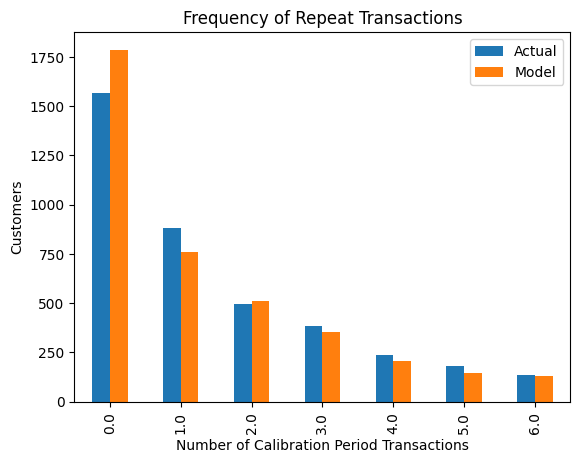

In [207]:
plot_period_transactions(bgf)

In [209]:
returning = cltv_df[cltv_df["frequency"]>0]
ggf = GammaGammaFitter(penalizer_coef=0)
ggf.fit(returning["frequency"],returning["monetary_value"]) 

<lifetimes.GammaGammaFitter: fitted with 2772 subjects, p: 2.19, q: 3.63, v: 496.82>

In [210]:
ggf.conditional_expected_average_profit(returning["frequency"],
                                        returning["monetary_value"]).sort_values(ascending = False)

Customer ID
18102.00000   10158.74242
14646.00000    8544.95079
12415.00000    8016.68660
17450.00000    6161.54527
16684.00000    4194.94747
                  ...    
16668.00000     121.38849
14560.00000     121.15880
15581.00000     103.64157
18037.00000      86.35787
17961.00000      55.94654
Length: 2772, dtype: float64

In [211]:
ggf.conditional_expected_average_profit(cltv_df["frequency"],
                                        cltv_df["monetary_value"])

Customer ID
12346.00000   413.52547
12347.00000   568.64147
12348.00000   331.42097
12349.00000   413.52547
12350.00000   413.52547
                 ...   
18280.00000   413.52547
18281.00000   413.52547
18282.00000   261.04036
18283.00000   174.85930
18287.00000   490.03783
Length: 4338, dtype: float64

In [212]:
cltv_df["expected_average_profit"] = ggf.conditional_expected_average_profit(cltv_df["frequency"],
                                        cltv_df["monetary_value"])

In [213]:
cltv_df.sort_values(by="expected_average_profit",ascending=False)

,frequency,recency,T,monetary_value,expected_puch_1_week,expected_puch_1_month,expected_average_profit
Customer ID,,,,,,,
18102.00000,20.00000,52.00000,52.00000,10744.15275,0.34491,1.37964,10158.74242
14646.00000,29.00000,50.00000,50.00000,8881.82483,0.51260,2.05040,8544.95079
12415.00000,13.00000,45.00000,48.00000,8719.35385,0.24416,0.97662,8016.68660
17450.00000,20.00000,51.00000,52.00000,6506.83775,0.34491,1.37964,6161.54527
16684.00000,13.00000,51.00000,51.00000,4544.41808,0.23170,0.92678,4194.94747
...,...,...,...,...,...,...,...
16668.00000,5.00000,38.00000,40.00000,51.19200,0.11761,0.47045,121.38849
14560.00000,18.00000,50.00000,51.00000,101.64444,0.31675,1.26701,121.15880
15581.00000,9.00000,35.00000,52.00000,62.27444,0.16091,0.64365,103.64157


In [214]:
cltv = ggf.customer_lifetime_value(bgf,
                                   cltv_df["frequency"],
                                   cltv_df["recency"],
                                   cltv_df["T"],
                                   cltv_df["monetary_value"],
                                   time=3, #monthly
                                   freq="W",#freq of T
                                   discount_rate=0.01)

C:\Users\oskar\AppData\Roaming\Python\Python310\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [215]:
cltv

Customer ID
12346.00000    60.90611
12347.00000   804.62046
12348.00000   260.79777
12349.00000   334.82121
12350.00000    63.25844
                 ...   
18280.00000    70.01920
18281.00000    96.96275
18282.00000   209.57375
18283.00000   545.55574
18287.00000   446.00935
Name: clv, Length: 4338, dtype: float64

In [216]:
cltv_final = pd.merge(cltv_df,cltv,right_index=True,left_index=True)
cltv_final

,frequency,recency,T,monetary_value,expected_puch_1_week,expected_puch_1_month,expected_average_profit,clv
Customer ID,,,,,,,,
12346.00000,0.00000,0.00000,46.00000,0.00000,0.01153,0.04610,413.52547,60.90611
12347.00000,6.00000,52.00000,52.00000,599.70167,0.11073,0.44292,568.64147,804.62046
12348.00000,3.00000,40.00000,51.00000,298.54000,0.06158,0.24632,331.42097,260.79777
12349.00000,0.00000,0.00000,2.00000,0.00000,0.06336,0.25345,413.52547,334.82121
12350.00000,0.00000,0.00000,44.00000,0.00000,0.01197,0.04788,413.52547,63.25844
...,...,...,...,...,...,...,...,...
18280.00000,0.00000,0.00000,39.00000,0.00000,0.01325,0.05300,413.52547,70.01920
18281.00000,0.00000,0.00000,26.00000,0.00000,0.01835,0.07340,413.52547,96.96275
18282.00000,1.00000,17.00000,18.00000,77.84000,0.06283,0.25131,261.04036,209.57375


In [217]:
cltv_final.sort_values(by="clv",ascending=False).head(10)

,frequency,recency,T,monetary_value,expected_puch_1_week,expected_puch_1_month,expected_average_profit,clv
Customer ID,,,,,,,,
14646.00000,29.00000,50.00000,50.00000,8881.82483,0.51260,2.05040,8544.95079,55972.08088
18102.00000,20.00000,52.00000,52.00000,10744.15275,0.34491,1.37964,10158.74242,44774.15155
14096.00000,14.00000,14.00000,14.00000,3832.56714,0.67114,2.68457,3562.34634,30551.61574
14911.00000,47.00000,53.00000,53.00000,2909.85404,0.78343,3.13374,2847.63251,28508.13833
17450.00000,20.00000,51.00000,52.00000,6506.83775,0.34491,1.37964,6161.54527,27156.70406
12415.00000,13.00000,45.00000,48.00000,8719.35385,0.24416,0.97662,8016.68660,25011.81956
14156.00000,30.00000,52.00000,53.00000,3852.73033,0.50375,2.01501,3720.30155,23948.50322
17511.00000,25.00000,53.00000,53.00000,3565.05980,0.42149,1.68598,3420.55047,18423.40558
13694.00000,28.00000,53.00000,53.00000,2250.54518,0.47085,1.88340,2174.96489,13086.29881


In [218]:
cltv_final["segment"] = pd.qcut(cltv_final["clv"],4,labels=["D","C","B","A"])

In [219]:
cltv_final

,frequency,recency,T,monetary_value,expected_puch_1_week,expected_puch_1_month,expected_average_profit,clv,segment
Customer ID,,,,,,,,,
12346.00000,0.00000,0.00000,46.00000,0.00000,0.01153,0.04610,413.52547,60.90611,D
12347.00000,6.00000,52.00000,52.00000,599.70167,0.11073,0.44292,568.64147,804.62046,A
12348.00000,3.00000,40.00000,51.00000,298.54000,0.06158,0.24632,331.42097,260.79777,B
12349.00000,0.00000,0.00000,2.00000,0.00000,0.06336,0.25345,413.52547,334.82121,B
12350.00000,0.00000,0.00000,44.00000,0.00000,0.01197,0.04788,413.52547,63.25844,D
...,...,...,...,...,...,...,...,...,...
18280.00000,0.00000,0.00000,39.00000,0.00000,0.01325,0.05300,413.52547,70.01920,D
18281.00000,0.00000,0.00000,26.00000,0.00000,0.01835,0.07340,413.52547,96.96275,D
18282.00000,1.00000,17.00000,18.00000,77.84000,0.06283,0.25131,261.04036,209.57375,C


In [221]:
cltv_final.groupby("segment").agg(["mean","sum"])

frequency             recency                    T              \
             mean        sum     mean         sum     mean         sum   
segment                                                                  
D         0.25417  274.00000  5.76160  6211.00000 37.71707 40659.00000   
C         1.10297 1189.00000 16.20037 17464.00000 27.58071 29732.00000   
B         2.12894 2295.00000 20.32189 21907.00000 25.89703 27917.00000   
A         7.26160 7828.00000 32.91466 35482.00000 36.07514 38889.00000   

        monetary_value              expected_puch_1_week            \
                  mean          sum                 mean       sum   
segment                                                              
D             34.29493  36969.93150              0.01930  20.80908   
C            154.01001 166022.79002              0.04599  49.57412   
B            248.16905 267526.23147              0.07751  83.55083   
A            617.49802 665662.86918              0.17355 187.08167   

        expected_puch_1_month           expected_average_profit               \
                         mean       sum                    mean          sum   
segment                                                                        
D                     0.07721  83.23632               386.03662 416147.47738   
C                     0.18395 198.29647               353.51877 381093.23692   
B                     0.31002 334.20333               369.48316 398302.84683   
A                     0.69418 748.32667               571.93257 616543.31259   

               clv                
              mean           sum  
segment                           
D         89.43197   96407.65900  
C        193.58099  208680.31029  
B        334.91185  361034.96969  
A       1349.36795 1454618.65514

In [222]:
df = df_.copy()

def create_cltv(df,month=3):
    #data prep
    df.dropna(inplace=True)
    df = df[~df["Invoice"].str.contains("C",na=False)]
    df = df[df["Quantity"]>0]
    df = df[df["Price"]>0]


    def find_limits(df,variable):
        q1 = df[variable].quantile(0.01)
        q3 = df[variable].quantile(0.99)
        iqr = q3 - q1
        upper_limit = q3 + 1.5*iqr
        lower_limit = q1 - 1.5*iqr
        df[variable].clip(upper=upper_limit,inplace=True)
        
    find_limits(df,"Quantity")
    find_limits(df,"Price")
    df["total_price"] = df["Quantity"] * df["Price"]
    
    cltv_df=summary(df,"Customer ID","InvoiceDate","total_price",
        observation_period_end="2011-12-11",
        freq="W")
    
    # BG-NBD
    bgf = BetaGeoFitter(penalizer_coef=0.1)
    bgf.fit(frequency=cltv_df["frequency"],
        recency=cltv_df["recency"],
        T=cltv_df["T"])
    cltv_df["expected_puch_1_week"] = bgf.predict(1,
            cltv_df["frequency"],
            cltv_df["recency"],
            cltv_df["T"])
    
    cltv_df["expected_puch_1_month"] =bgf.predict(4,
            cltv_df["frequency"],
            cltv_df["recency"],
            cltv_df["T"])
    
    # Gamma Gamma
    returning = cltv_df[cltv_df["frequency"]>0]
    ggf = GammaGammaFitter(penalizer_coef=0)
    ggf.fit(returning["frequency"],returning["monetary_value"]) 
    cltv_df["expected_average_profit"] = ggf.conditional_expected_average_profit(cltv_df["frequency"],
                                        cltv_df["monetary_value"])
    
    #final
    cltv = ggf.customer_lifetime_value(bgf,
                                   cltv_df["frequency"],
                                   cltv_df["recency"],
                                   cltv_df["T"],
                                   cltv_df["monetary_value"],
                                   time=month, #monthly
                                   freq="W",#freq of T
                                   discount_rate=0.01)
    
    cltv_final = pd.merge(cltv_df,cltv,right_index=True,left_index=True)
    cltv_final["segment"] = pd.qcut(cltv_final["clv"],4,labels=["D","C","B","A"])
    
    return cltv_final

create_cltv(df)

C:\Users\oskar\AppData\Roaming\Python\Python310\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,frequency,recency,T,monetary_value,expected_puch_1_week,expected_puch_1_month,expected_average_profit,clv,segment
Customer ID,,,,,,,,,
12346.00000,0.00000,0.00000,46.00000,0.00000,0.01153,0.04610,413.52547,60.90611,D
12347.00000,6.00000,52.00000,52.00000,599.70167,0.11073,0.44292,568.64147,804.62046,A
12348.00000,3.00000,40.00000,51.00000,298.54000,0.06158,0.24632,331.42097,260.79777,B
12349.00000,0.00000,0.00000,2.00000,0.00000,0.06336,0.25345,413.52547,334.82121,B
12350.00000,0.00000,0.00000,44.00000,0.00000,0.01197,0.04788,413.52547,63.25844,D
...,...,...,...,...,...,...,...,...,...
18280.00000,0.00000,0.00000,39.00000,0.00000,0.01325,0.05300,413.52547,70.01920,D
18281.00000,0.00000,0.00000,26.00000,0.00000,0.01835,0.07340,413.52547,96.96275,D
18282.00000,1.00000,17.00000,18.00000,77.84000,0.06283,0.25131,261.04036,209.57375,C
